# FLIGHT TRAVEL FLOW MAP
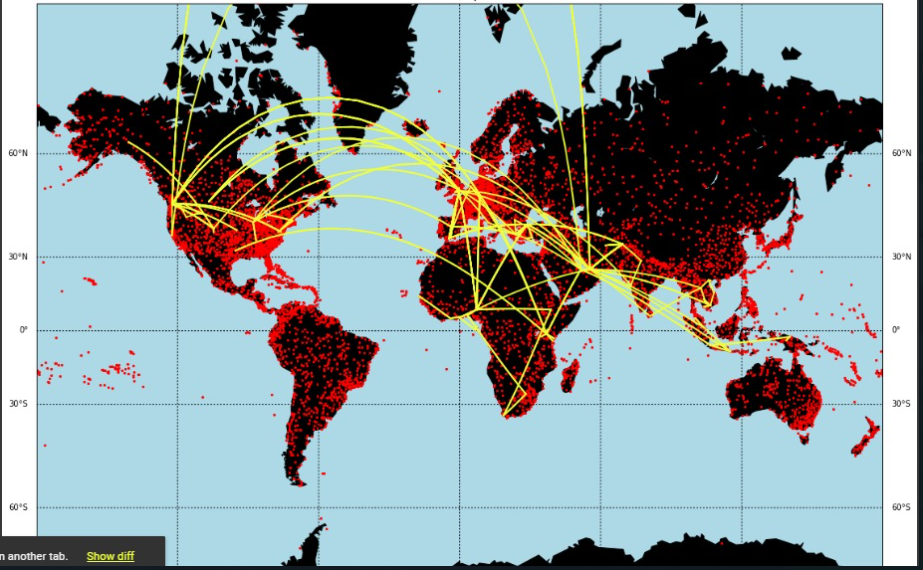

In [1]:
#!pip install basemap
#!pip install basemap-data

In [2]:
#!pip install geopandas

## Introduction to Basemap
- Basemap is a powerful package in Python and we will pick some important features to explain in details. To have more understanding about the package, please check out the[documentation.](https://matplotlib.org/basemap/users/index.html)!
- The matplotlib basemap toolkit is a library for plotting 2D data on map in Python. As everyone agrees that visualization is really important for people to understand data, map is the best visualization method when we are dealing with geographic locations

### Projection
- As we all know, the earth is round. Therefore, to make it as a 2D map, we need some projection methods. In basemap package, it supports many projection methods and the list is [here](https://matplotlib.org/basemap/users/mapsetup.html). Here are two examples of how to apply different projection methods in basemap.
1. Projection — Orthographic

In [54]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from folium.plugins import MarkerCluster

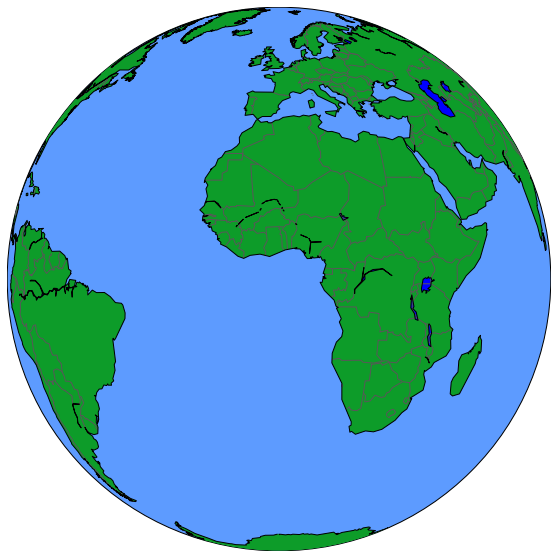

In [6]:

plt.figure(figsize=(10,10))
map = Basemap(projection='ortho', lat_0=0, lon_0=0)
map.drawmapboundary(fill_color='#5D9BFF')
map.fillcontinents(color='#0D9C29',lake_color='blue')
map.drawcountries(color='#585858',linewidth=1)
map.drawcoastlines()
plt.show()

2. Projection — Gall Stereographic

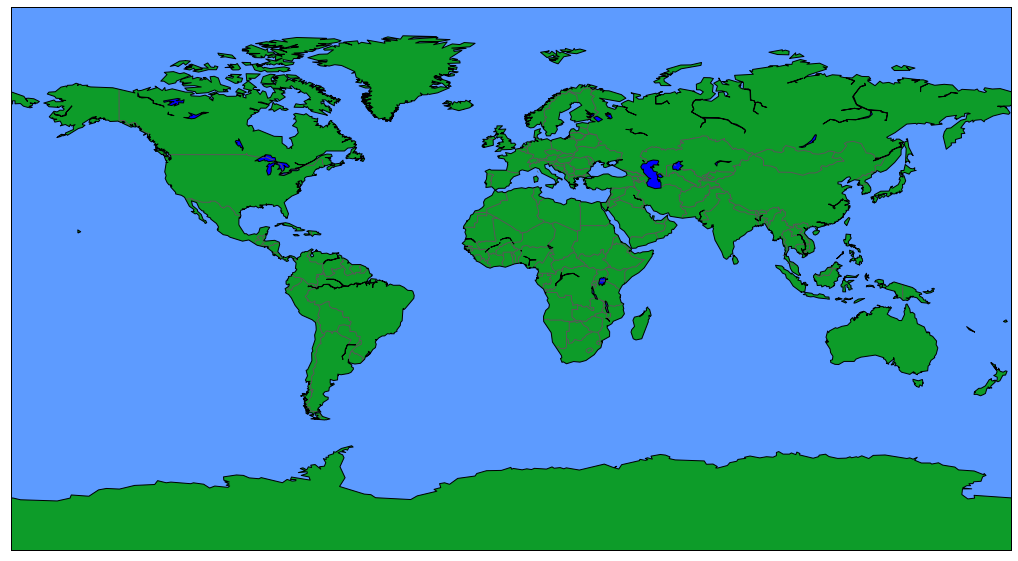

In [8]:
plt.figure(figsize=(20,10))
map = Basemap(projection='gall')
map.drawmapboundary(fill_color='#5D9BFF')
map.fillcontinents(color='#0D9C29',lake_color='blue')
map.drawcountries(color='#585858',linewidth=1)
map.drawcoastlines()
plt.show()

### Data
- In OpenFlights database, we are able to access Airports and Routes information around the world. With the information, we can make our plan to travel around the world. However, before that, let’s take a look at the data and use basemap tool to visualize it first.
- OpenFlights, it includes all 6,060 airports around the world with completed Name, City, Country, IATA code, Latitude, Longitude and all other information. Besides, since it has latitude and longitude information, we can easily lookup more details, such as the continent the airport belongs to, with Google Map api or other tools. We can also use basemap tool to put the airports on the map with different colors for airports in different continents: North America, South America, Asia, Europe, Africa and Oceania as following.

In [12]:
# read Airports data from a url
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'

airports = pd.read_csv(url, delimiter=',', names=['id', 'name', 'city', 'country', 'iata',
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])
airports.head()

,id,name,city,country,iata,icao,lat,long,altitude,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [19]:
#read data I created based on the clients Travel list data
df = pd.read_excel('/content/final_data.xlsx')
df.head()

,Trip_Id,Type_of_trip,Leg_Id,Date,Aiport_Codes,origin_lat,origin long,Airport_Name,City,country,Aiport_Codes.1,destination_lat,destination_long,Airport_Name.1,City.1,country.1,Notes
0,1,personal,1,2013-11-21 00:00:00,2050,34.565899,69.212303,Hamid Karzai International Airport,Kabul,Afghanistan,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),"(Safi, Qatar, Batik Air, MAF, foot, motorcylce..."
1,1,personal,2,2013-11-21 00:00:00,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),2241,25.261101,51.565102,Doha International Airport,Doha,Qatar,NaN
2,1,personal,3,2013-11-22 00:00:00,2241,25.261101,51.565102,Doha International Airport,Doha,Qatar,3275,-6.125570,106.655998,Soekarno-Hatta International Airport,Jakarta,Indonesia,NaN
3,1,personal,4,2013-11-22 00:00:00,3275,-6.125570,106.655998,Soekarno-Hatta International Airport,Jakarta,Indonesia,3244,-2.576950,140.516006,Sentani International Airport,Sentani,"Papua, Indonesia",NaN
4,1,personal,5,2013-11-26 00:00:00,3244,-2.576950,140.516006,Sentani International Airport,Sentani,"Papua, Indonesia",3245,-4.102510,138.957001,Wamena Airport,Wamena,"Papua, Indonesia",NaN


In [50]:
#Routes data from openflights database
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat'

routes_data = pd.read_csv(url, delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])

routes_data.head()

,airline,id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stops,equitment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [55]:
import geopandas as gpd
from shapely.geometry import LineString

geometry = [LineString([[df.iloc[i]['origin long'], df.iloc[i]['origin_lat']], [df.iloc[i]['destination_long'], df.iloc[i]['destination_lat']]]) for i in range(df.shape[0])]
routes = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
routes.head()

,Trip_Id,Type_of_trip,Leg_Id,Date,Aiport_Codes,origin_lat,origin long,Airport_Name,City,country,Aiport_Codes.1,destination_lat,destination_long,Airport_Name.1,City.1,country.1,Notes,geometry
0,1,personal,1,2013-11-21 00:00:00,2050,34.565899,69.212303,Hamid Karzai International Airport,Kabul,Afghanistan,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),"(Safi, Qatar, Batik Air, MAF, foot, motorcylce...","LINESTRING (69.21230 34.56590, 55.36440 25.25280)"
1,1,personal,2,2013-11-21 00:00:00,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),2241,25.261101,51.565102,Doha International Airport,Doha,Qatar,NaN,"LINESTRING (55.36440 25.25280, 51.56510 25.26110)"
2,1,personal,3,2013-11-22 00:00:00,2241,25.261101,51.565102,Doha International Airport,Doha,Qatar,3275,-6.125570,106.655998,Soekarno-Hatta International Airport,Jakarta,Indonesia,NaN,"LINESTRING (51.56510 25.26110, 106.65600 -6.12..."
3,1,personal,4,2013-11-22 00:00:00,3275,-6.125570,106.655998,Soekarno-Hatta International Airport,Jakarta,Indonesia,3244,-2.576950,140.516006,Sentani International Airport,Sentani,"Papua, Indonesia",NaN,"LINESTRING (106.65600 -6.12557, 140.51601 -2.5..."
4,1,personal,5,2013-11-26 00:00:00,3244,-2.576950,140.516006,Sentani International Airport,Sentani,"Papua, Indonesia",3245,-4.102510,138.957001,Wamena Airport,Wamena,"Papua, Indonesia",NaN,"LINESTRING (140.51601 -2.57695, 138.95700 -4.1..."


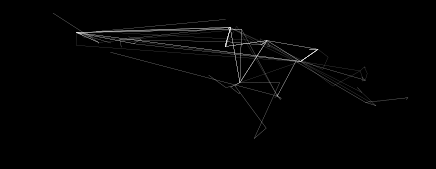

In [35]:
fig = plt.figure(facecolor='black')
ax = plt.axes()

fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')

routes.plot(ax=ax, color='white', linewidth=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

plt.show()

In [52]:
df.head(2)

,Trip_Id,Type_of_trip,Leg_Id,Date,Aiport_Codes,origin_lat,origin long,Airport_Name,City,country,Aiport_Codes.1,destination_lat,destination_long,Airport_Name.1,City.1,country.1,Notes,geometry
0,1,personal,1,2013-11-21 00:00:00,2050,34.565899,69.212303,Hamid Karzai International Airport,Kabul,Afghanistan,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),"(Safi, Qatar, Batik Air, MAF, foot, motorcylce...","LINESTRING (69.21230 34.56590, 55.36440 25.25280)"
1,1,personal,2,2013-11-21 00:00:00,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),2241,25.261101,51.565102,Doha International Airport,Doha,Qatar,NaN,"LINESTRING (55.36440 25.25280, 51.56510 25.26110)"


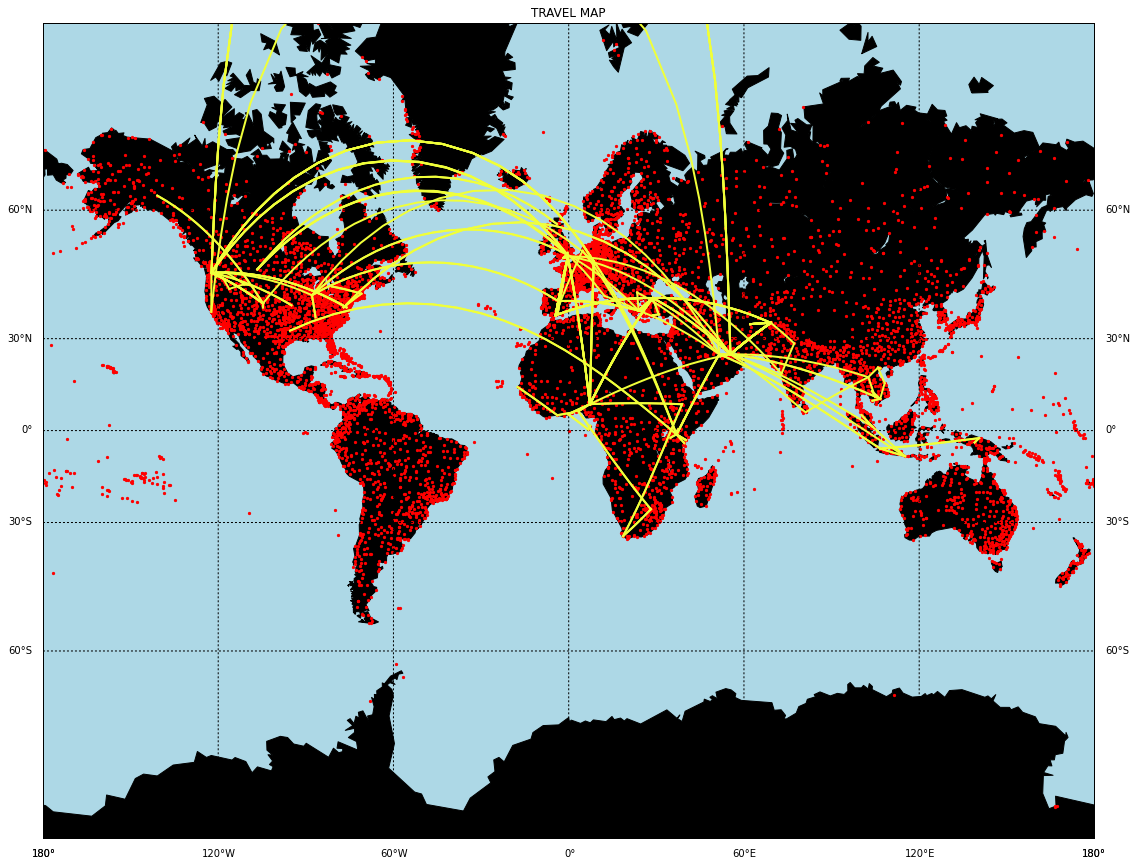

In [71]:
color_set = ["#5DADE2","#F1C40F","#E74C3C","#3D3228","#ECF0F1","#73FF5B","#ffcb5b","#b55bff"]
fig = plt.figure(num=None, figsize=(20, 15) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color="black",lake_color="lightblue")
#m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
plt.title("TRAVEL MAP")

x1, y1 = m(list(airports.long),list(airports.lat))
m.scatter(x1,y1,color='red',s=5,zorder=2)

for index, row in routes.iterrows():
    x2, y2 = m.gcpoints(row["origin long"],row["origin_lat"],row["destination_long"],row["destination_lat"],20)
    plt.plot(x2,y2,color="#F0FF3A",linewidth=2.0)
plt.show()